In [1]:
from rdkit import Chem 
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt
import numpy as np
from data_ import Dataset_
from utils_ import loss_

# QM9 dataset 

In [2]:
sdf_file = r'C:\Users\zcemg08\Documents\GitHub\Mol_gan\data\gdb9_clean.sdf'
df_qm9   = PandasTools.LoadSDF(sdf_file,smilesName='SMILES',molColName='Molecule',\
                               includeFingerprints=False)

In [3]:
df_qm9['SMILES'].to_csv(r'C:\Users\zcemg08\PycharmProjects\LSTM\data\qm9_smiles.txt',
                          header=None, index=None, sep=' ', mode='a')

In [4]:
print('dataset length = {}'.format(len(df_qm9)))

dataset length = 88641


In [5]:
df_qm9['l'] = df_qm9['SMILES'].apply(lambda x: len(x))

print('maximum string length = {}'.format(max(df_qm9['l'].values)))

maximum string length = 30


,ID,Molecule,SMILES,l
18223,gdb_24186,,C1=C2N[CH+][NH+]3CC([CH-]1)C23,30

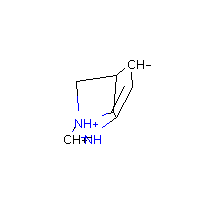

In [6]:
# Print molecule with maximum string length 
df_qm9.loc[df_qm9['l']==max(df_qm9['l'].values)]

,ID,Molecule,SMILES,l
3,gdb_7,,CC,2
4,gdb_8,,CO,2

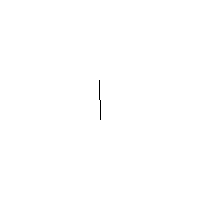
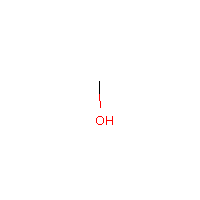

In [7]:
# Print molecule with minimum string length 
df_qm9.loc[df_qm9['l']==min(df_qm9['l'].values)]

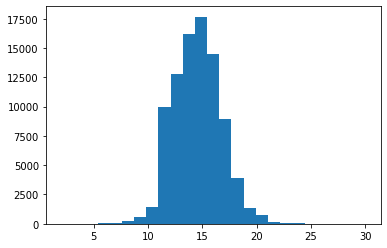

In [8]:
#Plot distribution of sequence length in QM9 dataset

plt.hist(df_qm9['l'].values,bins=25)
plt.show()

In [9]:
df_qm9['n_atoms'] = df_qm9['Molecule'].apply(lambda x:x.GetNumAtoms())

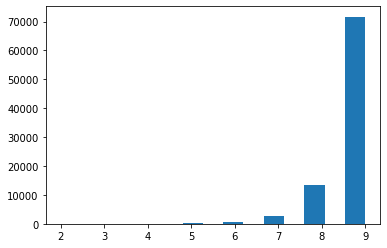

In [10]:
#Plot distribution of the number of atoms in each molecule in QM9 dataset

plt.hist(df_qm9['n_atoms'].values,bins=15)
plt.show() 

In [11]:
separator = ', '
unique_sym_list = list(set(separator.join(list(df_qm9['SMILES'].values))))
print('Unique symbols in dataset = {}, number of unique symbols = {}'.format(unique_sym_list,len(unique_sym_list)))

Unique symbols in dataset = ['3', '.', 'O', '+', 'H', '2', ')', '[', ' ', '(', ',', 'C', 'n', '4', '#', '-', 'N', 'F', '=', '5', ']', 'o', '1', 'c'], number of unique symbols = 24
